In [1]:
# this notebook demonstrates some basic functionality of the gaiamock package. 
import numpy as np
import matplotlib.pyplot as plt
import gaiamock
%matplotlib inline

# read in the compiled C functions
c_funcs = gaiamock.read_in_C_functions()

In [2]:
# generate mock astrometry of a binary: 
# I am choosing values more or less at at random here. 

t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_luminous_binary(ra = 21.2, dec=-16.4, parallax = 2.1, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 900, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc = 1.5, w = 1.0, epoch_err_mas = 0.05, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs)

Text(0, 0.5, '$\\eta\\,[\\rm mas]$')

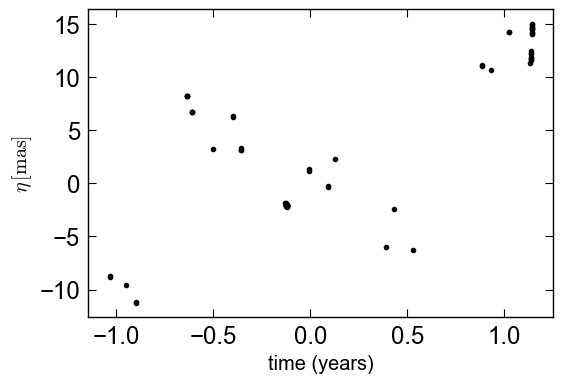

In [3]:
plt.errorbar(t_ast_yr, ast_obs, yerr=ast_err, fmt='k.')
plt.xlabel('time (years)')
plt.ylabel(r'$\eta\,[\rm mas]$')

single star chi2: 2086.70
binary star chi2: 104.83


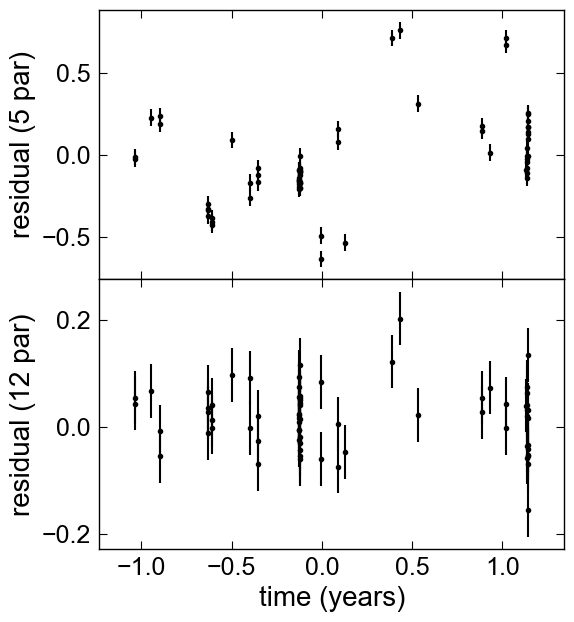

In [4]:
# try fitting the astrometry with a 5-parameter (single-star) model and plot the residuals. 
# also plot the residuals compared to the (known) true binary solution. 

gaiamock.plot_residuals(t_ast_yr, psi, plx_factor, ast_obs, ast_err, theta_array=[900, 293*2*np.pi/600, 0.3], c_funcs=c_funcs)

9 parameter solution accepted! Not trying anything else.
s9: 16.8, plx_over_err9: 74.4, F2_9: 2.7
single star chi2: 1890.32
9 parameter chi2: 94.88


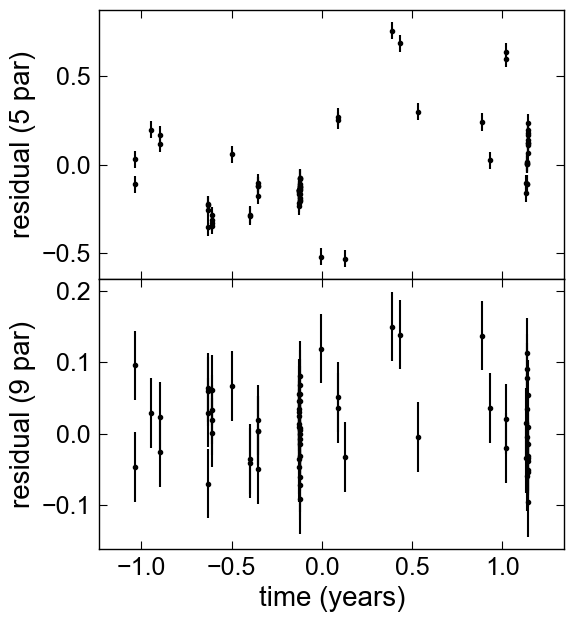

In [5]:
# now try running the full pipeline for the same parameters. That is, generate mock astrometry for a binary with 
# these parameters, and fit it with the cascade of astrometric models used in DR3. Stop when the first model is accepted. 
results_array = gaiamock.run_full_astrometric_cascade(ra = 21.2, dec=-16.4, parallax = 2.1, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 900, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc_deg = 1.5*180/np.pi, w = 1.0, phot_g_mean_mag = 13.4, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs, verbose=True, show_residuals=True)

found best-fit nonlinear parameters: [4.99935135e+02 3.62402564e+00 3.20107645e-01]
single star chi2: 7288.05
binary star chi2: 59.86
goodness_of_fit (F2) is low enough to pass DR3 cuts! F2: 0.2
a0_over_err is high enough to pass DR3 cuts! a0_over_err: 47.1
parallax over error is high enough to pass DR3 cuts! parallax_over_error: 131.5
eccentricity error is low enough to pass DR3 cuts! ecc_error: 0.03


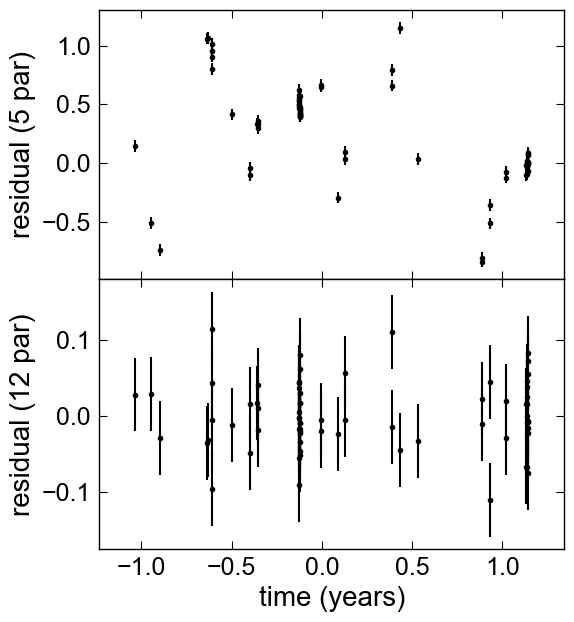

In [6]:
# try a shorter period, which will need an orbital solution. 
results_array = gaiamock.run_full_astrometric_cascade(ra = 21.2, dec=-16.4, parallax = 3.1, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 500, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc_deg = 1.5*180/np.pi, w = 1.0, phot_g_mean_mag = 13.4, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs, verbose=True, show_residuals=True)

found best-fit nonlinear parameters: [5.05012924e+02 3.98954995e+00 3.88026567e-01]
single star chi2: 1233.19
binary star chi2: 70.82
goodness_of_fit (F2) is low enough to pass DR3 cuts! F2: 0.8
a0_over_err is high enough to pass DR3 cuts! a0_over_err: 19.5
parallax over error is high enough to pass DR3 cuts! parallax_over_error: 47.9
eccentricity error is low enough to pass DR3 cuts! ecc_error: 0.07


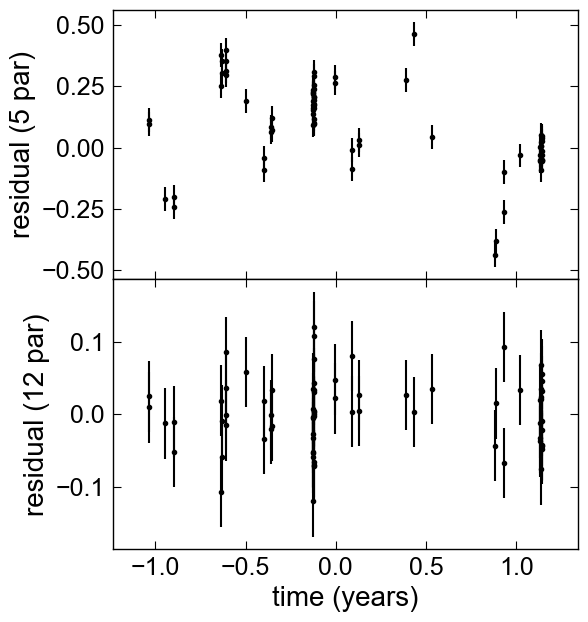

In [7]:
# More the same binary farther away...
results_array = gaiamock.run_full_astrometric_cascade(ra = 21.2, dec=-16.4, parallax = 1.1, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 500, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc_deg = 1.5*180/np.pi, w = 1.0, phot_g_mean_mag = 13.4, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs, verbose=True, show_residuals=True)

7 parameter solution accepted! Not trying anything else.
single star chi2: 913.43
7-parameter chi2: 74.38


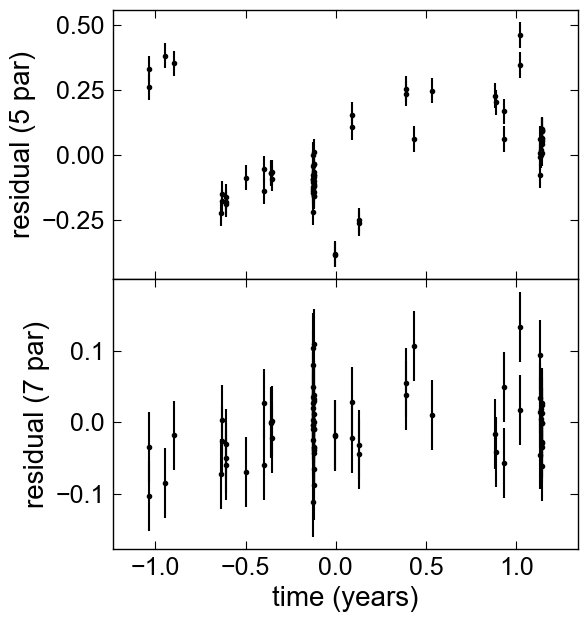

In [8]:
# A longer period, which will most likely get a 7 parameter solution 
results_array = gaiamock.run_full_astrometric_cascade(ra = 21.2, dec=-16.4, parallax = 1.1, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 2000, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc_deg = 1.5*180/np.pi, w = 1.0, phot_g_mean_mag = 13.4, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs, verbose=True, show_residuals=True)

In [9]:
# retrieve the scan times and angles for a particular sky location and data release 
scan_metadata = gaiamock.get_gost_one_position(ra=21.2, dec=-16.4, data_release='dr3')
scan_metadata

Target,ra[rad],dec[rad],CcdRow[1-7],scanAngle[rad],parallaxFactorAlongScan,ObservationTimeAtBarycentre[BarycentricJulianDateInTCB]
int64,float64,float64,int64,float64,float64,float64
31375,0.3681553890925539,-0.28509644025274633,3,-1.2775012082712864,0.6596226200079266,2457011.288252273
31375,0.3681553890925539,-0.28509644025274633,1,-1.2753811918885363,0.6587262637249152,2457011.3623085367
31375,0.3681553890925539,-0.28509644025274633,2,0.4507716526698957,-0.6555983976212346,2457042.3398949793
31375,0.3681553890925539,-0.28509644025274633,4,-0.720097526673168,0.45971323815780407,2457061.2648412115
31375,0.3681553890925539,-0.28509644025274633,2,-0.7233751189990705,0.4621993429712031,2457061.3388990154
31375,0.3681553890925539,-0.28509644025274633,1,2.5012703032465122,-0.14830848019251966,2457157.4369953526
31375,0.3681553890925539,-0.28509644025274633,3,2.489902402189289,-0.1388358043053892,2457157.61310894
...,...,...,...,...,...,...
31375,0.3681553890925539,-0.28509644025274633,7,0.09216715456265397,-0.053164498589248675,2457805.9759103344


Text(0, 0.5, '$\\eta\\,\\,[\\rm mas]$')

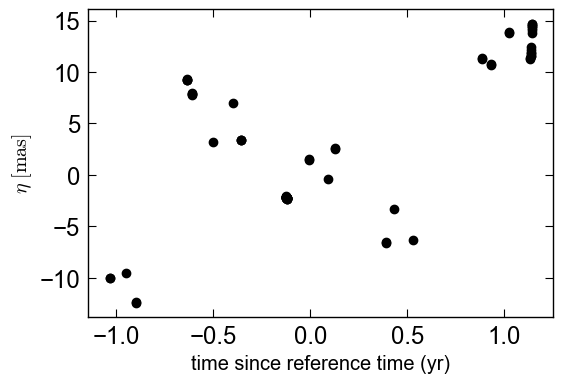

In [10]:
# what if you want to predict astromety from a single star? There's a function for that

t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_single_source(ra = 21.2, dec=-16.4, 
            parallax = 2.1, pmra = -7.5, pmdec = 13.2, phot_g_mean_mag = 13.4,data_release = 'dr3', c_funcs = c_funcs)

plt.errorbar(t_ast_yr, ast_obs, yerr=ast_err, fmt='ko')
plt.xlabel('time since reference time (yr)')
plt.ylabel(r'$\eta\,\,[\rm mas]$')


In [11]:
# try fitting a 5-parameter solution and checking its ruwe (really UWE)
# here mu and sigma_mu are ra, pmra, dec, pmdec, plx, and the corresponding uncertainties
ruwe, mu, sigma_mu = gaiamock.check_ruwe(t_ast_yr, psi, plx_factor, ast_obs, ast_err)
print(ruwe)

0.9899521314199202


In [12]:
# on the other hand, if we predict ruwe for a binary, we should get a bad fit. 
t_ast_yr, psi, plx_factor, ast_obs, ast_err = gaiamock.predict_astrometry_luminous_binary(ra = 21.2, dec=-16.4, parallax = 2.1, 
                        pmra = -7.5, pmdec = 13.2, m1 = 0.9, m2 = 0.65, period = 900, Tp = 293, ecc = 0.3, 
                        omega = 2.0, inc = 1.5, w = 1.0, epoch_err_mas = 0.05, f = 0.2, data_release = 'dr3',
                        c_funcs = c_funcs)
ruwe, mu, sigma_mu = gaiamock.check_ruwe(t_ast_yr, psi, plx_factor, ast_obs, ast_err)
print(ruwe)

5.394186605554029


Text(0, 0.5, 'RV (km/s)')

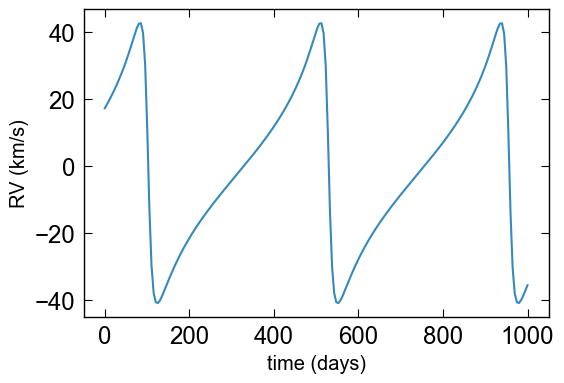

In [13]:
# You can also use this code to (quickly) calculate RV curves. 
rv_time_grid = np.linspace(0, 1000, 200)
rv_curve = gaiamock.predict_radial_velocities(t_rvs_day = rv_time_grid, period = 427, Tp = 102, ecc = 0.7, 
                                              w = 1.5, K = 42, gamma = -1.2, c_funcs = c_funcs)
plt.plot(rv_time_grid, rv_curve)
plt.xlabel('time (days)')
plt.ylabel('RV (km/s)')

Text(0, 0.5, '$\\rm RV\\,\\,[km\\,s^{-1}]$')

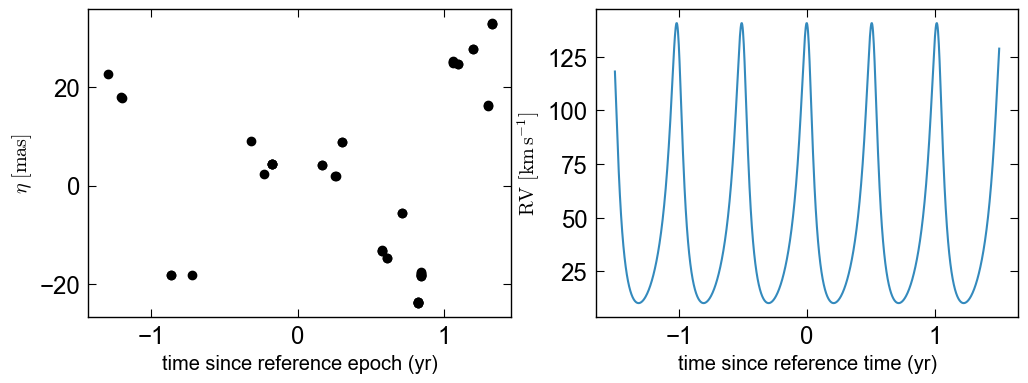

In [14]:
# there is also a convenience function for predicting astrometry and RVs at the same time. Let's do it for Gaia BH1

scan_metadata = gaiamock.get_gost_one_position(ra=262.1712081, dec=-0.58109202, data_release='dr3')
psi, plx_factor, jds = gaiamock.fetch_table_element(['scanAngle[rad]', 'parallaxFactorAlongScan', 'ObservationTimeAtBarycentre[BarycentricJulianDateInTCB]'], scan_metadata)
t_ast_day = jds - 2457389.0 # reference time for DR3
t_ast_yr = t_ast_day/365.25 

t_rvs_yr = np.linspace(-1.5, 1.5, 1000) # arbitrary 

ast_pred, rvs_pred = gaiamock.predict_astrometry_and_rvs_simultaneously(t_ast_yr = t_ast_yr, psi = psi, 
        plx_factor = plx_factor, t_rvs_yr = t_rvs_yr, period = 185.387, Tp=2.07, ecc=0.43230, m1=0.93, 
       m2=9.27, f=0, parallax=2.09, pmra=-7.70, pmdec=-25.85, omega=97.0*np.pi/180, w=16.509*np.pi/180,
       inc_deg=126.8, gamma=48.379, c_funcs=c_funcs)

f, ax =plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(t_ast_yr, ast_pred, 'ko')
ax[1].plot(t_rvs_yr, rvs_pred)
ax[0].set_xlabel('time since reference epoch (yr)')
ax[1].set_xlabel('time since reference time (yr)')
ax[0].set_ylabel(r'$\eta\,\,[\rm mas]$')
ax[1].set_ylabel(r'$\rm RV\,\,[km\,s^{-1}]$')

In [15]:
# What's the probability that a binary with some properties would have gotten an orbital solution in DR3?
# simulate a 100 binaries all across the sky, within a 500 pc volume, and report the outcomes
ra, dec, d_pc, phot_g_mean_mag, Tp, omega, w, inc_deg, accept = gaiamock.simulate_many_realizations_of_a_single_binary(
    d_min = 0, d_max = 500, period = 800, Mg_tot = 4.5, f = 0.2, m1 = 1, m2 = 0.7, ecc = 0.3, 
    N_realizations = 100, data_release='dr3', do_dust=True)

0 out of 100 solutions had insufficient visibility periods
0 out of 100 solutions had ruwe < 1.4
15 out of 100 solutions got 9-parameter solutions
1 out of 100 solutions got 7-parameter solutions
81 out of 100 solutions passed all cuts and got an orbital solution!
3 out of 100 solutions got to orbital solutions but failed at least one cut. 


Text(0, 0.5, 'Dec (deg)')

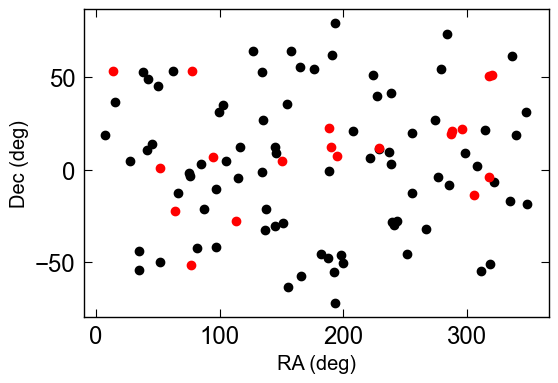

In [16]:
# plot the sky distribution of the ones that did and did not get accepted with orbital solutions. 
plt.plot(ra[accept], dec[accept], 'ko')
plt.plot(ra[~accept], dec[~accept], 'ro')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')

Text(0, 0.5, 'G (mag)')

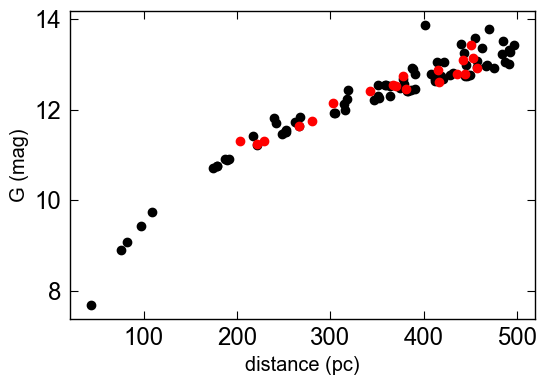

In [17]:
# and their distances. 
plt.plot(d_pc[accept], phot_g_mean_mag[accept], 'ko')
plt.plot(d_pc[~accept], phot_g_mean_mag[~accept], 'ro')
plt.xlabel('distance (pc)')
plt.ylabel('G (mag)')

In [18]:
# what if we want everything at the same distance (e.g. if we want to make plots like Figs 12-15 of the paper)?
# the simplest approach is to set d_min and d_max to a narrow range, e.g:
dist_pc = 500
d_min, d_max = 0.99*dist_pc, 1.01*dist_pc
ra, dec, d_pc, phot_g_mean_mag, Tp, omega, w, inc_deg, accept = gaiamock.simulate_many_realizations_of_a_single_binary(
    d_min = d_min, d_max = d_max, period = 800, Mg_tot = 4.5, f = 0.2, m1 = 1, m2 = 0.7, ecc = 0.3, 
    N_realizations = 100, data_release='dr3', do_dust=True)

0 out of 100 solutions had insufficient visibility periods
0 out of 100 solutions had ruwe < 1.4
16 out of 100 solutions got 9-parameter solutions
1 out of 100 solutions got 7-parameter solutions
76 out of 100 solutions passed all cuts and got an orbital solution!
7 out of 100 solutions got to orbital solutions but failed at least one cut. 


In [19]:
# We can also make predictions for DR4+:
ra, dec, d_pc, phot_g_mean_mag, Tp, omega, w, inc_deg, accept = gaiamock.simulate_many_realizations_of_a_single_binary(
    d_min = d_min, d_max = d_max, period = 800, Mg_tot = 4.5, f = 0.2, m1 = 1, m2 = 0.7, ecc = 0.3, 
    N_realizations = 100, data_release='dr4', do_dust=True)

0 out of 100 solutions had insufficient visibility periods
0 out of 100 solutions had ruwe < 1.4
0 out of 100 solutions got 9-parameter solutions
0 out of 100 solutions got 7-parameter solutions
100 out of 100 solutions passed all cuts and got an orbital solution!
0 out of 100 solutions got to orbital solutions but failed at least one cut. 
